In [105]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [106]:
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [127]:
data = pd.read_csv('../data/완성data/new_select_data.csv')

In [128]:
# 원하는 컬럼 순서 지정
col = ['부서별_인력구성(생산)', '부서별_인력구성(RnD)', '총자산회전율', '순이익률', 'ROE',
       '주력제품 국내 시장점유율(퍼센트)', '학력별 인력구성비(대졸)',
       '엔젤투자자 혹은 액셀러레이터 투자 경험여부', '창업 당시 창업자 최종학력', '창업 직전 근무지',
       '창업 당시 목표시장', '해외수출 및 진출과정 애로사항', '연구개발관련전담부서보유여부', '벤처확인 유형',
       '벤처캐피털(투자조합포함) 투자 경험여부']

# 컬럼 순서 변경
data = data.reindex(columns=col)

In [129]:
data['창업 당시 목표시장'] = data['창업 당시 목표시장'].astype('int64')
data['해외수출 및 진출과정 애로사항'] = data['해외수출 및 진출과정 애로사항'].astype('int64')
data['연구개발관련전담부서보유여부'] = data['연구개발관련전담부서보유여부'].astype('int64')

In [130]:
data.drop('벤처확인 유형', axis=1, inplace=True)

In [131]:
# 원-핫 인코딩 적용
df = pd.get_dummies(data, columns=['창업 당시 창업자 최종학력', '창업 직전 근무지', '창업 당시 목표시장', '해외수출 및 진출과정 애로사항', '연구개발관련전담부서보유여부'])
df

,부서별_인력구성(생산),부서별_인력구성(RnD),총자산회전율,순이익률,ROE,주력제품 국내 시장점유율(퍼센트),학력별 인력구성비(대졸),엔젤투자자 혹은 액셀러레이터 투자 경험여부,벤처캐피털(투자조합포함) 투자 경험여부,창업 당시 창업자 최종학력_1,...,해외수출 및 진출과정 애로사항_3,해외수출 및 진출과정 애로사항_4,해외수출 및 진출과정 애로사항_5,해외수출 및 진출과정 애로사항_6,해외수출 및 진출과정 애로사항_7,해외수출 및 진출과정 애로사항_8,연구개발관련전담부서보유여부_1,연구개발관련전담부서보유여부_2,연구개발관련전담부서보유여부_3,연구개발관련전담부서보유여부_4
0,0.000,40.000,0.056,-1739.260,360.366,1.00,46.667,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0.000,20.000,182.613,3.063,20.487,1.00,20.000,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0.000,13.333,47.157,8.065,5.656,10.00,13.333,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,26.627,23.669,55.927,-6.119,-13.836,30.00,20.000,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,28.182,22.727,69.228,-11.386,-16.891,30.00,20.000,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12379,0.000,36.364,78.543,-11.720,-26.679,0.01,81.818,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12380,50.000,6.667,603.905,2.822,44.500,15.00,40.000,0,0,0,...,0,0,0,0,0,0,0,0,1,0
12381,0.000,1.923,385.063,-0.801,-15.723,1.00,48.077,0,0,0,...,0,0,1,0,0,0,1,0,0,0
12382,0.000,20.690,511.376,2.205,37.902,5.00,90.000,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [132]:
df = df[[col for col in df.columns if col != '벤처캐피털(투자조합포함) 투자 경험여부'] + ['벤처캐피털(투자조합포함) 투자 경험여부']]

In [170]:
df

,부서별_인력구성(생산),부서별_인력구성(RnD),총자산회전율,순이익률,ROE,주력제품 국내 시장점유율(퍼센트),학력별 인력구성비(대졸),엔젤투자자 혹은 액셀러레이터 투자 경험여부,창업 당시 창업자 최종학력_1,창업 당시 창업자 최종학력_2,...,해외수출 및 진출과정 애로사항_4,해외수출 및 진출과정 애로사항_5,해외수출 및 진출과정 애로사항_6,해외수출 및 진출과정 애로사항_7,해외수출 및 진출과정 애로사항_8,연구개발관련전담부서보유여부_1,연구개발관련전담부서보유여부_2,연구개발관련전담부서보유여부_3,연구개발관련전담부서보유여부_4,벤처캐피털(투자조합포함) 투자 경험여부
0,0.00000,0.40000,0.000030,0.000000,0.740643,0.010,0.46667,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0.00000,0.20000,0.097721,0.909954,0.623444,0.010,0.20000,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0.00000,0.13333,0.025235,0.912567,0.618330,0.100,0.13333,0,0,1,...,1,0,0,0,0,1,0,0,0,0
3,0.26627,0.23669,0.029928,0.905159,0.611608,0.300,0.20000,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0.28182,0.22727,0.037046,0.902408,0.610555,0.300,0.20000,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17196,0.50000,0.33333,0.074258,0.912311,0.622280,0.009,0.48333,0,0,0,...,0,0,0,0,0,1,0,0,0,1
17197,0.02609,0.12174,0.051038,0.908621,0.616634,0.150,0.53000,0,0,0,...,0,0,0,0,0,1,0,0,0,1
17198,0.51149,0.13218,0.053088,0.902259,0.611604,0.080,0.88000,0,0,0,...,0,0,0,0,0,0,0,1,0,1
17199,0.44444,0.33333,0.065466,0.898708,0.606244,0.040,0.66667,0,0,1,...,0,0,0,0,0,1,0,0,0,1


In [172]:
df[df.iloc[:,-1]==1]

,부서별_인력구성(생산),부서별_인력구성(RnD),총자산회전율,순이익률,ROE,주력제품 국내 시장점유율(퍼센트),학력별 인력구성비(대졸),엔젤투자자 혹은 액셀러레이터 투자 경험여부,창업 당시 창업자 최종학력_1,창업 당시 창업자 최종학력_2,...,해외수출 및 진출과정 애로사항_4,해외수출 및 진출과정 애로사항_5,해외수출 및 진출과정 애로사항_6,해외수출 및 진출과정 애로사항_7,해외수출 및 진출과정 애로사항_8,연구개발관련전담부서보유여부_1,연구개발관련전담부서보유여부_2,연구개발관련전담부서보유여부_3,연구개발관련전담부서보유여부_4,벤처캐피털(투자조합포함) 투자 경험여부
0,0.00000,0.40000,0.000030,0.000000,0.740643,0.010,0.46667,0,0,0,...,0,0,0,0,0,1,0,0,0,1
9,0.83117,0.03896,0.017547,0.876402,0.608491,0.200,0.84158,1,0,0,...,0,0,0,0,0,0,1,0,0,1
19,0.00000,0.16949,0.016183,0.888349,0.608261,0.020,0.64407,0,0,0,...,0,0,0,0,0,1,0,0,0,1
81,0.50000,0.05714,0.076547,0.901668,0.508128,0.002,0.30000,0,0,0,...,0,0,0,0,0,1,0,0,0,1
97,0.75000,0.02083,0.053081,0.908882,0.617444,0.600,0.13000,1,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17196,0.50000,0.33333,0.074258,0.912311,0.622280,0.009,0.48333,0,0,0,...,0,0,0,0,0,1,0,0,0,1
17197,0.02609,0.12174,0.051038,0.908621,0.616634,0.150,0.53000,0,0,0,...,0,0,0,0,0,1,0,0,0,1
17198,0.51149,0.13218,0.053088,0.902259,0.611604,0.080,0.88000,0,0,0,...,0,0,0,0,0,0,0,1,0,1
17199,0.44444,0.33333,0.065466,0.898708,0.606244,0.040,0.66667,0,0,1,...,0,0,0,0,0,1,0,0,0,1


In [134]:
print(len(df[df['벤처캐피털(투자조합포함) 투자 경험여부'] == 1]))
print(len(df[df['벤처캐피털(투자조합포함) 투자 경험여부'] == 0]))

917
11467


# OverSampling

In [121]:
from imblearn.over_sampling import RandomOverSampler

In [135]:
# 독립변수와 종속변수 설정
X = df.iloc[:,:-1]
y = df['벤처캐피털(투자조합포함) 투자 경험여부']

# 다수 클래스는 그대로 두고 소수 클래스만 늘리는 RandomOverSampler 객체 생성
ros = RandomOverSampler(sampling_strategy={1: 5734}, random_state=0)

# 리샘플링 수행
X_resampled, y_resampled = ros.fit_resample(X, y)

print(X_resampled.shape, y_resampled.shape)

(17201, 38) (17201,)


In [136]:
# 오버샘플링된 데이터를 데이터프레임으로 변환
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['벤처캐피털(투자조합포함) 투자 경험여부'] = y_resampled

In [137]:
print(len(df_resampled[df_resampled['벤처캐피털(투자조합포함) 투자 경험여부'] == 1]))
print(len(df_resampled[df_resampled['벤처캐피털(투자조합포함) 투자 경험여부'] == 0]))

5734
11467


In [72]:
# df_resampled.to_csv('resampled_df_2vs1.csv', index=False)

In [138]:
df = df_resampled
df

,부서별_인력구성(생산),부서별_인력구성(RnD),총자산회전율,순이익률,ROE,주력제품 국내 시장점유율(퍼센트),학력별 인력구성비(대졸),엔젤투자자 혹은 액셀러레이터 투자 경험여부,창업 당시 창업자 최종학력_1,창업 당시 창업자 최종학력_2,...,해외수출 및 진출과정 애로사항_4,해외수출 및 진출과정 애로사항_5,해외수출 및 진출과정 애로사항_6,해외수출 및 진출과정 애로사항_7,해외수출 및 진출과정 애로사항_8,연구개발관련전담부서보유여부_1,연구개발관련전담부서보유여부_2,연구개발관련전담부서보유여부_3,연구개발관련전담부서보유여부_4,벤처캐피털(투자조합포함) 투자 경험여부
0,0.000,40.000,0.056,-1739.260,360.366,1.0,46.667,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0.000,20.000,182.613,3.063,20.487,1.0,20.000,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0.000,13.333,47.157,8.065,5.656,10.0,13.333,0,0,1,...,1,0,0,0,0,1,0,0,0,0
3,26.627,23.669,55.927,-6.119,-13.836,30.0,20.000,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,28.182,22.727,69.228,-11.386,-16.891,30.0,20.000,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17196,50.000,33.333,138.768,7.576,17.111,0.9,48.333,0,0,0,...,0,0,0,0,0,1,0,0,0,1
17197,2.609,12.174,95.376,0.511,0.738,15.0,53.000,0,0,0,...,0,0,0,0,0,1,0,0,0,1
17198,51.149,13.218,99.207,-11.671,-13.848,8.0,88.000,0,0,0,...,0,0,0,0,0,0,0,1,0,1
17199,44.444,33.333,122.338,-18.471,-29.392,4.0,66.667,0,0,1,...,0,0,0,0,0,1,0,0,0,1


# Scaling

In [73]:
# df = pd.read_csv('../data/완성data/resampled_df_2vs1.csv')

In [139]:
from sklearn.preprocessing import MinMaxScaler

In [140]:
df.iloc[:,:7]

,부서별_인력구성(생산),부서별_인력구성(RnD),총자산회전율,순이익률,ROE,주력제품 국내 시장점유율(퍼센트),학력별 인력구성비(대졸)
0,0.000,40.000,0.056,-1739.260,360.366,1.0,46.667
1,0.000,20.000,182.613,3.063,20.487,1.0,20.000
2,0.000,13.333,47.157,8.065,5.656,10.0,13.333
3,26.627,23.669,55.927,-6.119,-13.836,30.0,20.000
4,28.182,22.727,69.228,-11.386,-16.891,30.0,20.000
...,...,...,...,...,...,...,...
17196,50.000,33.333,138.768,7.576,17.111,0.9,48.333
17197,2.609,12.174,95.376,0.511,0.738,15.0,53.000
17198,51.149,13.218,99.207,-11.671,-13.848,8.0,88.000
17199,44.444,33.333,122.338,-18.471,-29.392,4.0,66.667


In [141]:
# 비율형 변수만 분리
tran_df = df.iloc[:,:7]

In [142]:
# 분리한 데이터 Scaling
mm = MinMaxScaler()
mm_tran_df = mm.fit_transform(tran_df)
mm_tran_df = pd.DataFrame(mm_tran_df, columns=tran_df.columns)

In [143]:
# 원본데이터에 Scaling 데이터 치환
df.iloc[:,:7] = mm_tran_df

In [89]:
# df.to_csv('2vs1_data.csv', index=False)

In [144]:
# df.to_csv('scaling_data_2vs1.csv', index=False)

# Cross-validation

In [145]:
import numpy as np

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_val_score, cross_validate

In [155]:
# Random Forest

X = df.iloc[:, :-1]
y = df['벤처캐피털(투자조합포함) 투자 경험여부']

# 모델 생성
model = RandomForestClassifier(max_depth=10)

# 교차검증 수행
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
f1scores = cross_val_score(model, X, y, scoring='f1', cv=cv)
accuracyscore = cross_val_score(model, X, y, scoring='accuracy', cv=cv)

# 결과 출력
print('Cross-Validation F1 scores : ', f1scores)
print('Mean F1 score : ', f1scores.mean())
print('Cross-Validation Accuracy scores:', accuracyscore)
print('Mean Accuracy:', accuracyscore.mean())

Cross-Validation F1 scores :  [0.78842315 0.72920892 0.72338258 0.74974874 0.75422886]
Mean F1 score :  0.7489984511538209
Cross-Validation Accuracy scores: [0.8744551  0.84709302 0.84505814 0.84796512 0.85610465]
Mean Accuracy: 0.8541352060988221


In [148]:
# Logistic Regression

X = df.iloc[:, :-1]
y = df['벤처캐피털(투자조합포함) 투자 경험여부']

# 모델 생성
lr = LogisticRegression()

# 교차검증 수행
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
l_f1scores = cross_val_score(lr, X, y, scoring='f1', cv=cv)
l_accuracyscore = cross_val_score(lr, X, y, scoring='accuracy', cv=cv)

# 결과 출력
print('Cross-Validation F1 scores : ', l_f1scores)
print('Mean F1 score : ', l_f1scores.mean())
print('Cross-Validation Accuracy scores:', l_accuracyscore)
print('Mean Accuracy:', l_accuracyscore.mean())

Cross-Validation F1 scores :  [0.54983571 0.52349727 0.52734164 0.54357298 0.54039301]
Mean F1 score :  0.5369281214311175
Cross-Validation Accuracy scores: [0.76111595 0.74651163 0.74622093 0.75639535 0.75523256]
Mean Accuracy: 0.7530952839561242


---

In [205]:
# 1:1 데이터로 다시 해보자

df_1 = pd.read_csv('../data/완성data/scaling_data_1vs1.csv')

In [167]:
# Random Forest

X = df_1.iloc[:, :-1]
y = df_1['벤처캐피털(투자조합포함) 투자 경험여부']

# 모델 생성
model = RandomForestClassifier(max_depth=10, random_state=0)

# 교차검증 수행
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
f1scores = cross_val_score(model, X, y, scoring='f1', cv=cv)
accuracyscore = cross_val_score(model, X, y, scoring='accuracy', cv=cv)

# 결과 출력
print('Cross-Validation F1 scores : ', f1scores)
print('Mean F1 score : ', f1scores.mean())
print('Cross-Validation Accuracy scores:', accuracyscore)
print('Mean Accuracy:', accuracyscore.mean())

Cross-Validation F1 scores :  [0.88217391 0.87692642 0.86679747 0.88129654 0.87922078]
Mean F1 score :  0.8772830238684172
Cross-Validation Accuracy scores: [0.88183998 0.8763898  0.86679747 0.88183998 0.87832534]
Mean Accuracy: 0.8770385142942221


In [157]:
# Logistic Regression

X = df_1.iloc[:, :-1]
y = df_1['벤처캐피털(투자조합포함) 투자 경험여부']

# 모델 생성
lr = LogisticRegression()

# 교차검증 수행
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
l_f1scores = cross_val_score(lr, X, y, scoring='f1', cv=cv)
l_accuracyscore = cross_val_score(lr, X, y, scoring='accuracy', cv=cv)

# 결과 출력
print('Cross-Validation F1 scores : ', l_f1scores)
print('Mean F1 score : ', l_f1scores.mean())
print('Cross-Validation Accuracy scores:', l_accuracyscore)
print('Mean Accuracy:', l_accuracyscore.mean())

Cross-Validation F1 scores :  [0.70383912 0.69448928 0.69280443 0.68374885 0.69596738]
Mean F1 score :  0.6941698102322953
Cross-Validation Accuracy scores: [0.71746239 0.71114018 0.70961413 0.70132985 0.70737026]
Mean Accuracy: 0.7093833603774714


---

In [158]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
n_iter = 0

for train_index, test_index in skf.split(df_1, df_1['벤처캐피털(투자조합포함) 투자 경험여부']):
    train_data = df_1.iloc[train_index]
    test_data = df_1.iloc[test_index]

In [159]:
# 훈련 데이터에서 독립변수와 타겟변수를 나누기
X_train = train_data.drop('벤처캐피털(투자조합포함) 투자 경험여부', axis=1)
y_train = train_data['벤처캐피털(투자조합포함) 투자 경험여부']

# 테스트 데이터에서 독립변수와 타겟변수를 나누기
X_test = test_data.drop('벤처캐피털(투자조합포함) 투자 경험여부', axis=1)
y_test = test_data['벤처캐피털(투자조합포함) 투자 경험여부']

In [166]:
# RandomForest 모델 생성 및 훈련
model = RandomForestClassifier(max_depth=10, random_state=0)
model.fit(X_train, y_train)

# 테스트 데이터로 예측 수행
y_pred = model.predict(X_test)

# 평가지표 계산
accuracy = accuracy_score(y_test, y_pred)
F1_score = f1_score(y_test, y_pred)
print('Accuracy : ', accuracy)
print('F1 score : ', F1_score)

Accuracy :  0.8605056669572798
F1 score :  0.7604790419161678


In [97]:
import skimage
import shap
shap.initjs()

---

In [206]:
import xgboost as xgb
# import lightgbm as lgb
import catboost as cb
import shap
from sklearn.model_selection import train_test_split
import skimage

Learning rate set to 0.058822
0:	learn: 0.2461588	total: 135ms	remaining: 2m 14s
1:	learn: 0.2325258	total: 139ms	remaining: 1m 9s
2:	learn: 0.2199355	total: 145ms	remaining: 48.1s
3:	learn: 0.2076020	total: 150ms	remaining: 37.3s
4:	learn: 0.1963472	total: 154ms	remaining: 30.7s
5:	learn: 0.1851183	total: 158ms	remaining: 26.3s
6:	learn: 0.1749590	total: 164ms	remaining: 23.3s
7:	learn: 0.1649392	total: 168ms	remaining: 20.8s
8:	learn: 0.1558206	total: 173ms	remaining: 19s
9:	learn: 0.1471321	total: 176ms	remaining: 17.4s
10:	learn: 0.1385143	total: 178ms	remaining: 16s
11:	learn: 0.1307942	total: 181ms	remaining: 14.9s
12:	learn: 0.1231642	total: 183ms	remaining: 13.9s
13:	learn: 0.1164228	total: 185ms	remaining: 13.1s
14:	learn: 0.1100169	total: 189ms	remaining: 12.4s
15:	learn: 0.1039824	total: 191ms	remaining: 11.8s
16:	learn: 0.0981482	total: 194ms	remaining: 11.2s
17:	learn: 0.0927107	total: 196ms	remaining: 10.7s
18:	learn: 0.0876992	total: 199ms	remaining: 10.3s
19:	learn: 0.0

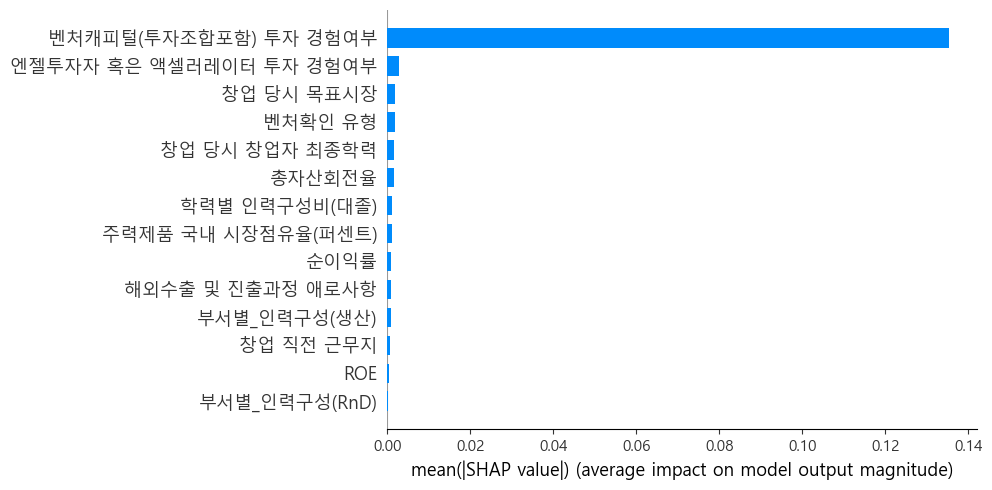

In [207]:
# 특징 변수와 타겟 변수 분리
X = df.iloc[:, :-1]
y = df['벤처캐피털(투자조합포함) 투자 경험여부']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# rf 모델 학습
model = cb.CatBoostRegressor()
model.fit(X_train, y_train)

# Tree SHAP Explainer 생성
explainer = shap.TreeExplainer(model)

# Tree SHAP 값을 계산
shap_values = explainer.shap_values(X_test)

# 특정 샘플의 Shap 요약 확인
sample_index = 0
shap.summary_plot(shap_values, X_test, feature_names=X.columns, plot_type="bar", plot_size=(10, 5))

# 특정 샘플의 Shap 값 확인
shap.force_plot(explainer.expected_value, shap_values[sample_index], X_test.iloc[sample_index, :], feature_names=X.columns)


TypeError: 'str' object is not callable

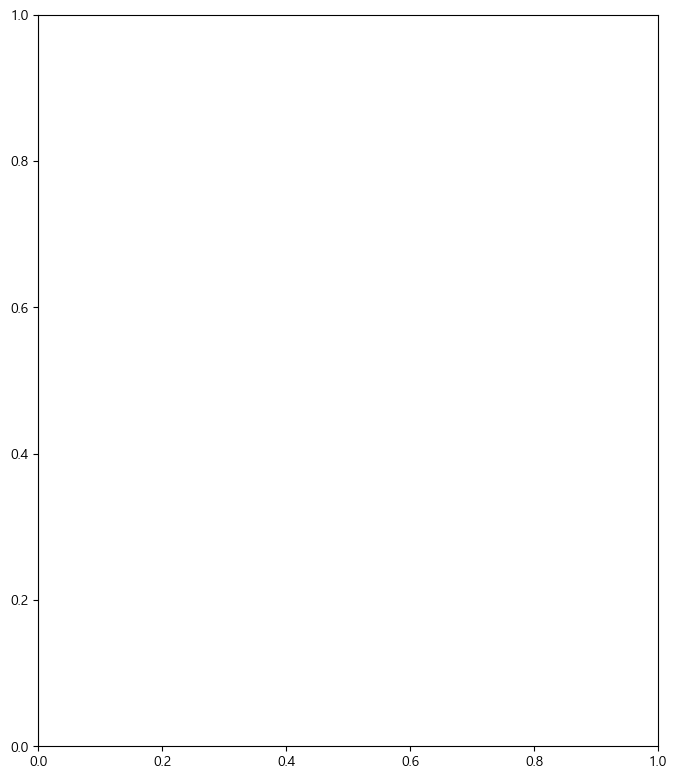

In [100]:
# SHAP summary plot 생성
shap.summary_plot(shap_values, X, feature_names=X.columns, plot_type="bar", color='blue')


In [95]:
 # 변수 간의 shap value 파악
shap.dependence_plot("주력제품 국내 시장점유율(퍼센트)", shap_values, X)

TypeError: The passed shap_values are a list not an array! If you have a list of explanations try passing shap_values[0] instead to explain the first output class of a multi-output model.

___

In [ ]:
# Random Forest

X = df_1.iloc[:, :-1]
y = df_1['벤처캐피털(투자조합포함) 투자 경험여부']

# 모델 생성
model = RandomForestClassifier(max_depth=10, random_state=0)

# 교차검증 수행
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
f1scores = cross_val_score(model, X, y, scoring='f1', cv=cv)
accuracyscore = cross_val_score(model, X, y, scoring='accuracy', cv=cv)

# 결과 출력
print('Cross-Validation F1 scores : ', f1scores)
print('Mean F1 score : ', f1scores.mean())
print('Cross-Validation Accuracy scores:', accuracyscore)
print('Mean Accuracy:', accuracyscore.mean())

In [168]:
model.fit(X, y)

RandomForestClassifier(max_depth=10, random_state=0)

In [169]:
df

,부서별_인력구성(생산),부서별_인력구성(RnD),총자산회전율,순이익률,ROE,주력제품 국내 시장점유율(퍼센트),학력별 인력구성비(대졸),엔젤투자자 혹은 액셀러레이터 투자 경험여부,창업 당시 창업자 최종학력_1,창업 당시 창업자 최종학력_2,...,해외수출 및 진출과정 애로사항_4,해외수출 및 진출과정 애로사항_5,해외수출 및 진출과정 애로사항_6,해외수출 및 진출과정 애로사항_7,해외수출 및 진출과정 애로사항_8,연구개발관련전담부서보유여부_1,연구개발관련전담부서보유여부_2,연구개발관련전담부서보유여부_3,연구개발관련전담부서보유여부_4,벤처캐피털(투자조합포함) 투자 경험여부
0,0.00000,0.40000,0.000030,0.000000,0.740643,0.010,0.46667,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0.00000,0.20000,0.097721,0.909954,0.623444,0.010,0.20000,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0.00000,0.13333,0.025235,0.912567,0.618330,0.100,0.13333,0,0,1,...,1,0,0,0,0,1,0,0,0,0
3,0.26627,0.23669,0.029928,0.905159,0.611608,0.300,0.20000,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0.28182,0.22727,0.037046,0.902408,0.610555,0.300,0.20000,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17196,0.50000,0.33333,0.074258,0.912311,0.622280,0.009,0.48333,0,0,0,...,0,0,0,0,0,1,0,0,0,1
17197,0.02609,0.12174,0.051038,0.908621,0.616634,0.150,0.53000,0,0,0,...,0,0,0,0,0,1,0,0,0,1
17198,0.51149,0.13218,0.053088,0.902259,0.611604,0.080,0.88000,0,0,0,...,0,0,0,0,0,0,0,1,0,1
17199,0.44444,0.33333,0.065466,0.898708,0.606244,0.040,0.66667,0,0,1,...,0,0,0,0,0,1,0,0,0,1


In [173]:
df = pd.read_csv('../data/완성data/new_select_data.csv')

In [179]:
df

,벤처확인 유형,엔젤투자자 혹은 액셀러레이터 투자 경험여부,창업 당시 창업자 최종학력,창업 직전 근무지,부서별_인력구성(생산),부서별_인력구성(RnD),총자산회전율,순이익률,ROE,주력제품 국내 시장점유율(퍼센트),학력별 인력구성비(대졸),창업 당시 목표시장,해외수출 및 진출과정 애로사항,벤처캐피털(투자조합포함) 투자 경험여부,연구개발관련전담부서보유여부
0,3,0,3,6,0.000,40.000,0.056,-1739.260,360.366,1.00,46.667,1.0,2.0,1,1.0
1,1,0,4,6,0.000,20.000,182.613,3.063,20.487,1.00,20.000,1.0,8.0,0,3.0
2,2,0,2,6,0.000,13.333,47.157,8.065,5.656,10.00,13.333,1.0,4.0,0,1.0
3,2,0,2,6,26.627,23.669,55.927,-6.119,-13.836,30.00,20.000,3.0,3.0,0,1.0
4,2,0,2,6,28.182,22.727,69.228,-11.386,-16.891,30.00,20.000,3.0,2.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12379,1,0,3,6,0.000,36.364,78.543,-11.720,-26.679,0.01,81.818,1.0,1.0,0,1.0
12380,2,0,3,10,50.000,6.667,603.905,2.822,44.500,15.00,40.000,3.0,2.0,0,3.0
12381,2,0,3,6,0.000,1.923,385.063,-0.801,-15.723,1.00,48.077,1.0,5.0,0,1.0
12382,2,0,3,5,0.000,20.690,511.376,2.205,37.902,5.00,90.000,1.0,2.0,0,2.0


In [195]:
a = df[df["벤처캐피털(투자조합포함) 투자 경험여부"]==1]
a["창업 직전 근무지"].value_counts()

6     375
5     283
7      57
1      49
4      44
3      41
10     35
2      13
9      12
8       8
Name: 창업 직전 근무지, dtype: int64

In [196]:
b = df[df.iloc[:,-2]==0]
b["창업 직전 근무지"].value_counts()

6     7114
5     2333
7      657
10     332
3      221
4      203
9      201
1      187
8      161
2       58
Name: 창업 직전 근무지, dtype: int64

In [183]:
df["부서별_인력구성(생산)"]

0         0.000
1         0.000
2         0.000
3        26.627
4        28.182
          ...  
12379     0.000
12380    50.000
12381     0.000
12382     0.000
12383     0.000
Name: 부서별_인력구성(생산), Length: 12384, dtype: float64

In [203]:
a[a["연구개발관련전담부서보유여부"]==1].describe()

,벤처확인 유형,엔젤투자자 혹은 액셀러레이터 투자 경험여부,창업 당시 창업자 최종학력,창업 직전 근무지,부서별_인력구성(생산),부서별_인력구성(RnD),총자산회전율,순이익률,ROE,주력제품 국내 시장점유율(퍼센트),학력별 인력구성비(대졸),창업 당시 목표시장,해외수출 및 진출과정 애로사항,벤처캐피털(투자조합포함) 투자 경험여부,연구개발관련전담부서보유여부
count,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.0,755.0
mean,2.684768,0.214570,2.427815,5.341722,27.345893,26.602799,93.154048,-79.716399,-19.085433,15.782252,53.968738,2.307285,4.046358,1.0,1.0
std,0.738281,0.410796,1.024123,1.716605,24.199714,21.953152,114.556195,294.869009,202.156972,19.516505,23.101996,0.934677,1.966354,0.0,0.0
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-1739.260000,-1787.500000,0.000000,0.000000,1.000000,1.000000,1.0,1.0
25%,2.000000,0.000000,2.000000,5.000000,2.713500,10.399500,45.229500,-23.691500,-22.946000,2.000000,37.000000,1.000000,3.000000,1.0,1.0
50%,3.000000,0.000000,3.000000,6.000000,22.642000,20.000000,72.206000,1.006000,3.453000,8.000000,52.727000,3.000000,4.000000,1.0,1.0
75%,3.000000,0.000000,3.000000,6.000000,48.644500,39.508500,114.570000,6.635500,14.418500,20.000000,70.135000,3.000000,5.000000,1.0,1.0
max,4.000000,1.000000,5.000000,10.000000,96.296000,100.000000,1868.724000,175.477000,1112.500000,100.000000,100.000000,3.000000,8.000000,1.0,1.0


In [204]:
b[b["연구개발관련전담부서보유여부"]==1].describe()

,벤처확인 유형,엔젤투자자 혹은 액셀러레이터 투자 경험여부,창업 당시 창업자 최종학력,창업 직전 근무지,부서별_인력구성(생산),부서별_인력구성(RnD),총자산회전율,순이익률,ROE,주력제품 국내 시장점유율(퍼센트),학력별 인력구성비(대졸),창업 당시 목표시장,해외수출 및 진출과정 애로사항,벤처캐피털(투자조합포함) 투자 경험여부,연구개발관련전담부서보유여부
count,8765.000000,8765.000000,8765.000000,8765.000000,8765.000000,8765.000000,8765.000000,8765.000000,8765.000000,8765.000000,8765.000000,8765.000000,8765.000000,8765.0,8765.0
mean,2.177867,0.021221,2.945123,5.818026,34.535148,22.298949,130.447759,-8.839541,7.506120,10.616087,48.224601,2.018369,3.521392,0.0,1.0
std,0.708051,0.144128,1.029827,1.289229,25.955766,19.795748,128.952570,115.276322,124.992251,15.675946,24.081274,0.995428,1.896008,0.0,0.0
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-1739.260000,-1787.500000,0.000000,0.000000,1.000000,1.000000,0.0,1.0
25%,2.000000,0.000000,2.000000,5.000000,7.692000,8.333000,67.015000,0.949000,2.949000,1.000000,30.000000,1.000000,2.000000,0.0,1.0
50%,2.000000,0.000000,3.000000,6.000000,36.486000,16.447000,103.817000,3.390000,10.069000,5.000000,45.000000,3.000000,3.000000,0.0,1.0
75%,2.000000,0.000000,3.000000,6.000000,56.364000,31.373000,157.201000,7.445000,20.796000,10.000000,66.667000,3.000000,4.000000,0.0,1.0
max,4.000000,1.000000,5.000000,10.000000,100.000000,100.000000,1868.724000,175.477000,1112.500000,100.000000,100.000000,3.000000,8.000000,0.0,1.0


In [201]:
a.sort_values('순이익률',ascending=False)[:30]

,벤처확인 유형,엔젤투자자 혹은 액셀러레이터 투자 경험여부,창업 당시 창업자 최종학력,창업 직전 근무지,부서별_인력구성(생산),부서별_인력구성(RnD),총자산회전율,순이익률,ROE,주력제품 국내 시장점유율(퍼센트),학력별 인력구성비(대졸),창업 당시 목표시장,해외수출 및 진출과정 애로사항,벤처캐피털(투자조합포함) 투자 경험여부,연구개발관련전담부서보유여부
11453,2,1,1,1,0.000,66.667,1868.724,175.477,1112.500,0.10,33.333,3.0,3.0,1,1.0
8894,3,0,3,6,2.727,0.000,6.737,175.477,41.998,0.50,61.000,3.0,4.0,1,1.0
5227,2,0,1,10,0.000,60.000,1868.724,175.477,1112.500,1.00,60.000,3.0,5.0,1,1.0
9405,3,1,3,5,40.000,40.000,52.866,49.799,68.508,50.00,100.000,3.0,3.0,1,1.0
11345,3,0,1,4,39.189,16.216,45.928,48.352,61.341,5.00,70.270,3.0,2.0,1,1.0
10367,4,0,2,6,11.111,77.778,82.242,47.148,45.062,5.00,62.000,1.0,1.0,1,1.0
4535,2,0,1,7,31.579,21.053,4.739,46.364,3.453,10.00,26.000,3.0,7.0,1,1.0
10246,3,0,3,7,0.000,0.000,21.085,41.747,9.077,20.98,95.455,2.0,4.0,1,3.0
11584,3,0,1,6,0.000,0.000,28.211,41.576,13.614,50.00,11.628,3.0,5.0,1,3.0
1078,4,0,2,10,14.493,50.725,23.853,41.239,10.280,0.00,72.000,2.0,5.0,1,2.0


In [185]:
b.describe()

,벤처확인 유형,엔젤투자자 혹은 액셀러레이터 투자 경험여부,창업 당시 창업자 최종학력,창업 직전 근무지,부서별_인력구성(생산),부서별_인력구성(RnD),총자산회전율,순이익률,ROE,주력제품 국내 시장점유율(퍼센트),학력별 인력구성비(대졸),창업 당시 목표시장,해외수출 및 진출과정 애로사항,벤처캐피털(투자조합포함) 투자 경험여부,연구개발관련전담부서보유여부
count,11467.000000,11467.000000,11467.000000,11467.000000,11467.000000,11467.000000,11467.000000,11467.000000,11467.000000,11467.000000,11467.000000,11467.000000,11467.000000,11467.0,11467.000000
mean,2.155577,0.020842,2.973751,5.855324,35.179606,21.352163,132.491756,-8.388219,7.546469,10.478083,47.750284,1.996686,3.515218,0.0,1.444842
std,0.689209,0.142863,1.029103,1.284526,26.268099,19.531841,130.686026,114.385938,124.269691,15.556511,24.375302,0.995449,1.895400,0.0,0.894674
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-1739.260000,-1787.500000,0.000000,0.000000,1.000000,1.000000,0.0,1.000000
25%,2.000000,0.000000,2.000000,5.000000,7.843000,7.692000,67.757500,0.977500,3.138500,1.000000,28.571000,1.000000,2.000000,0.0,1.000000
50%,2.000000,0.000000,3.000000,6.000000,37.500000,15.385000,104.538000,3.390000,10.241000,5.000000,44.444000,2.000000,3.000000,0.0,1.000000
75%,2.000000,0.000000,3.000000,6.000000,57.200500,29.730000,159.014000,7.397000,20.899000,10.000000,66.667000,3.000000,4.000000,0.0,1.000000
max,4.000000,1.000000,5.000000,10.000000,100.000000,100.000000,1868.724000,175.477000,1112.500000,100.000000,100.000000,3.000000,8.000000,0.0,4.000000
